# Week 05: In-Class Assignment: <br> Gaussian Process Regression

### <p style="text-align: right;"> &#9989; Kyle Taft.

![hidden_humor](https://imgs.xkcd.com/comics/extrapolating.png)

___

We have seen a few examples of performing regression, a type of supervised learning: linear regression (LR) and radial basis functions (RBFs). While these methods are often very good at allowing us to make predictions based on data, they can be lacking in this respect:
* We have no good way to know how accurate our result is. Nor do we have a good way to include our knowledge of the accuracy in the data before it is used for training. 

Suppose that you are working on a scientific research project where you will generate data at tremendous cost. This could be either, or both, generating data from very expensive experiments or very time-consuming numerical calculations. You know that you simply will not be able to have very many data points and you are, understandably, quite worried that you have no way to know how accurate the predictions away from the (very few) data points might be. Moreover, you also realize that if you had a way to estimate the errors in your predictions -- _as you were taking data_ --  _you could guide which new data points would be most valuable_, saving months or years. 

In this project you will consider two cases separately, but they are related:
* Estimating prediction errors for very high-quality data. This is the case we saw for RBFs where we believe that the data is very accurate so we want to do "exact interpolation".
* Estimating prediction errors when the training data itself contains errors.

The ML approach you will use here is called Gaussian Process Regression (GPR). As it turns out, the theory behind this is a bit complicated, so we are only going to use it as a black box to get useful results out of `sklearn`. Later in the course we will work through a detailed derivation so that you know what is in the "black box" you are using today. 

---
## Part 1: Data With No Errors

Let's get started with the usual, which is to import the libraries we need. Note that we control the random number seed so that we can control the sequence as work through the notebook without new surprises every time we run it. If you want new results, change the seed.

In [23]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ConstantKernel as C

rng = np.random.default_rng(42)

&#9989; **Question 1.1:** Discuss the two `sklearn` imports so that you get a sense for what things you can vary. Someday you might need these libraries in your project and/or research! For example, what is a "kernel"? How many kernels does `sklearn` have built in? 

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 
 
Our group discussed these libraries and they do:

1. GaussianProcessRegressor is a model that creates probabilistic prediction of the interval off of the provided data
2. A kernal defines the covariance of the GPR. This defines what we mean the similarity between two points is. The options I could find were: ConstantKernel, Sum, Product, Exponentiation, WhiteKernel, RBF, Matern, RationalQuadratic, ExpSineSquared, and  DotProduct


&#9989; **Task 1.2:** Great! Next we are going to make some fake data. Feel free to invent your own functions here - you might have something in mind from your research, so invent a function that looks like your data. Have each person in your group think of a different function with a very different shape; this will help you see what works and what does not work as well. 

In [24]:
def func_1(x):
    """The function to predict. This function is used to make 
    fake data so that we have control over the variations in the data."""
    return x * np.sin(np.sqrt(x))
  
def func_2(x):
    """The function to predict. This function is used to make 
    fake data so that we have control over the variations in the data."""
    return x * np.sin(x)
  
def func_3(x):
    """The function to predict. This function is used to make 
    fake data so that we have control over the variations in the data.
    This is what was used for the lecture slidess."""
    return np.sqrt(x) * np.sin(x)

def func_4(x):
    return 2**-x + np.sin(x)


Recall that `sklearn` likes to have the data specific forms when you call it.

&#9989; **Task 1.3:**  Among your group members, discuss these functions:
* `np.atleast_2d`
* `.ravel`
* `.T`
* `np.newaxis`
  
In a markdown cell, give a summary of what each of these functions do and at least one other option you might have used if you did not know these libraries. 

<font size=6 color="#009600">&#9998;</font> *Put your answers here!* 

1. This function takes in an array and returns an array with at least 2d.
2. Ravel flattens the array to 1d
3. T is the transpose of the array
4. Adds a dimension to an array

Flatten also flattens the array to 1d
 

&#9989; **Task 1.4:**  We will only use 1D data in this project to make it easier to visualize, but obviously the libraries are mostly used in higher dimensions. Examine, perhaps through print statements, what the shape of the data is so that you can see how the data needs to be prepared before heading into `sklearn`. For example, are these "row" or "column" vectors? Are they dictionaries? Lists? Lists of lists? If we were doing a 2D problem, how would containers of these shapes handle that case? 

In [52]:
# Generate data points for the function
data_points = np.array([1,3, 5,8, 10]) # Choose your points

X_train = data_points[:, np.newaxis] # What does this do? What is the shape of the array?

print(X_train.shape)

y_train = func_3(X_train).ravel() # What is the shape of this array?

print(y_train.shape)

# Make a finer grid
X_test = np.linspace(1, 10, 100)
y_test = func_3(X_test)

(5, 1)
(5,)


<font size=6 color="#009600">&#9998;</font> *Put your conclusions here!* 

data_points[:, np.newaxis] is making X_train a column vector of size 3x1. func_3(X_train).ravel() is making y_train an array of size 3. 

If the data was 2D instead of having to add a newaxis we would just have to transpose the data if it was not already in the correct shape. We would still have to flatten the y_train data.

Progress! Time to use the `sklearn` libraries. In GPR, we should specify the kernel we wish to use, and we will start with the Gaussian kernel, which is known as the RBF kernel in `sklearn`. 

Then, as with all `sklearn` methods we need to instantiate the ML object. Once we have that object and the data stored in exactly the right way, we perform the fit and the prediction in just two lines. Wow! 


&#9989; **Task 1.5:** In your group discuss the options being used in the code below. In general, ML algorithms have what are called _hyperparameters_, which are parameters not of your model/hypothesis but of the algorithnm itself. For example, in the pre-class assignment on Radial Basis Functions (RBF) you chose (perhaps unknowingly!) the width of the Gaussian; while it all worked out, you _could_ have varied those widths to perhaps achieve a better fit. This is known as **hyperparameter tuning** and it is a very important part of getting the most out of ML algorithms. 

The parameters used below correspond to.....

C:\Users\2003k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\2003k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 10.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


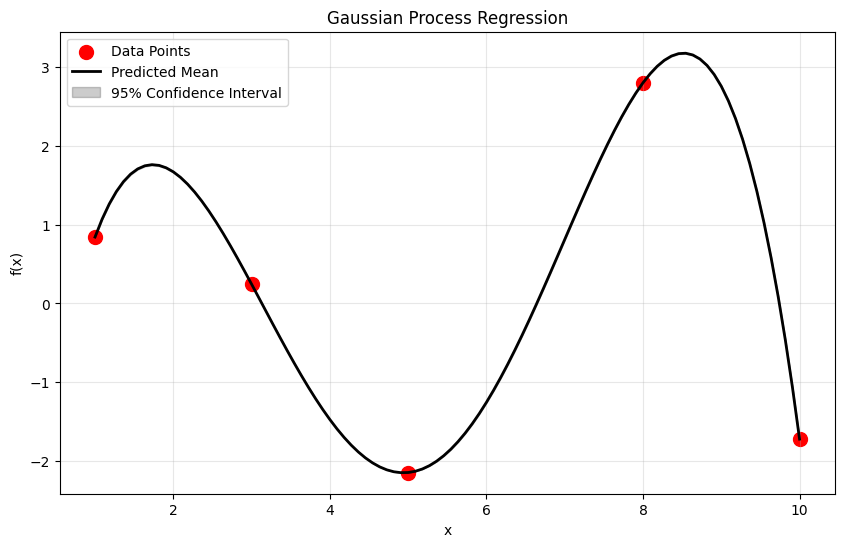

In [64]:
# Choose your kernel!

# Gaussian kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10.0, (1e+1, 1e2))
# Quadratic kernel
#kernel = C(1.0, (1e-3, 1e3)) * RationalQuadratic(length_scale=1.0, alpha=0.1)

gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)

# Fit to data
gpr.fit(X_train, y_train)

# Make the prediction on the finer grid as well, including
# getting information on the confidence intervals. 
y_pred, sigma = gpr.predict(X_test[:,np.newaxis], return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='r', s=100, label='Data Points')
# plt.plot(X_test, func_3(X_test), ls = '--', label = 'Real Function')
plt.plot(X_test, y_pred, 'k', lw=2, label='Predicted Mean')
# What does this do? 
plt.fill_between(
    X_test, y_pred - 1.96 * sigma, 
    y_pred + 1.96 * sigma, 
    alpha=0.2, 
    color='k',
    label='95% Confidence Interval')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gaussian Process Regression')
plt.legend()
plt.grid(alpha = 0.3)

In [65]:
gpr.kernel_.get_params()

{'k1': 31.6**2,
 'k2': RBF(length_scale=10),
 'k1__constant_value': 999.9999999999998,
 'k1__constant_value_bounds': (0.001, 1000.0),
 'k2__length_scale': 10.000000000000002,
 'k2__length_scale_bounds': (10.0, 100.0)}

&#9989; **Question 1.6:** What are the values of the hyperparameters of your model? 

In [27]:
# Put code you might need here 

&#9989; **Question 1.7:** What does the above plot tell you? Where are the areas with the largest uncertainty? How would you go about reducing that uncertainty?

<font size=6 color="#009600">&#9998;</font> *Put your conclusions here!* 

&#9989; **Task 1.8:** Next, you are going to make a lot of plots and discuss what they tell you. There are four things you should explore:

1. the different functions your group members chose
2. the number of points in the data (see discussion below)
3. the GPR hyperparameters in `sklearn` - how sensitive is the result to hyperparameter tuning?
4. different kernels

Vary all of these *together* so that you can see how each impacts the other. You might end up with as many as 20 plots. Then, discuss all of your findings in a summary markdown cell after the plots. (Just copy and paste the code and use `subplots` to help organize the results. Divide, conquer, discuss.) 

In your answer, think through how you would use this is a real life situation where you, for example, needed to generate a few more data points that would be extremely expensive. For example, as you vary the number of points, pick a small number (perhaps four), look at your result to find the region of largest uncertainty and add your next point exactly in the center of that region. Where should the next experiment or computation be? How did that change the prediction and where do you think the next point should be? 

**HINTS:** Divide and conquer! Save your plots somewhere where you can see them all together, perhaps presentation slides? 

In [28]:
# Put your code here

<font size=6 color="#009600">&#9998;</font> *Discuss your conclusion here*

---
## Part 2: Data With Error Bars

In the above you assumed that the data was perfect: each point was a very accurate measurement. For such a case, you want the prediction to go through those points exactly. This is an extremely common use case because computations and experiments often make very accurate predictions, but only at a preciously few points. 

However, there is another use case where you have error in the data itself. Not every experiment or computation is perfect, and now we would like to take that into account. We can see how uncertainty in the data contributes the uncertainty in the prediction. So that you can get the most out of this exercise, carefully choose among the cases you looked at in the first part above so that you can do a direct comparison.  

&#9989; **Task 2.1:** Work through this code following the instructions in the comments. Discuss the results within your group and write a summary of your findings in the markdown cell below. 

In [29]:
# Generate data points for the function
data_points = np.linspace(0.1, 9.9, 20) # Choose your points
X_train = data_points[:, np.newaxis] # What does this do? What is the shape of the array?

y_train = func_3(X_train).ravel() # What is the shape of this array?

# What does this do??
dy = 0.5 + 1.0 * np.random.random(y_train.shape)
noise = np.random.normal(0, dy)
y_train += noise


# again, change this to match the case(s) you will compare with
# why the new argument? vary the value used to see what it does
gpr = GaussianProcessRegressor(kernel=kernel, alpha=dy,
                              n_restarts_optimizer=10)

# I think we are getting used to what this does in sklearn! 
gpr.fit(X_train, y_train)

# Make the prediction on the finer grid as well, including
# getting information on the confidence intervals. 
y_pred, sigma = gpr.predict(X_test, return_std=True)

# Discuss how the error bars are computed and plotted: you may need to do this someday!
plt.figure(figsize=(10, 6))

# What does this do? 
plt.errorbar(X_train.ravel(), y_train, dy, fmt='r.', ms= 15,  label='Observations')

plt.plot(X_test, y_pred, 'k', lw=2, label='Predicted Mean')

# What does this do? 
plt.fill_between(
    X_test.ravel(), y_pred - 1.96 * sigma, 
    y_pred + 1.96 * sigma, 
    alpha=0.2, 
    color='k',
    label='95% Confidence Interval')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gaussian Process Regression')
plt.legend()
plt.grid(alpha = 0.3)


ValueError: Expected 2D array, got 1D array instead:
array=[ 1.          1.09090909  1.18181818  1.27272727  1.36363636  1.45454545
  1.54545455  1.63636364  1.72727273  1.81818182  1.90909091  2.
  2.09090909  2.18181818  2.27272727  2.36363636  2.45454545  2.54545455
  2.63636364  2.72727273  2.81818182  2.90909091  3.          3.09090909
  3.18181818  3.27272727  3.36363636  3.45454545  3.54545455  3.63636364
  3.72727273  3.81818182  3.90909091  4.          4.09090909  4.18181818
  4.27272727  4.36363636  4.45454545  4.54545455  4.63636364  4.72727273
  4.81818182  4.90909091  5.          5.09090909  5.18181818  5.27272727
  5.36363636  5.45454545  5.54545455  5.63636364  5.72727273  5.81818182
  5.90909091  6.          6.09090909  6.18181818  6.27272727  6.36363636
  6.45454545  6.54545455  6.63636364  6.72727273  6.81818182  6.90909091
  7.          7.09090909  7.18181818  7.27272727  7.36363636  7.45454545
  7.54545455  7.63636364  7.72727273  7.81818182  7.90909091  8.
  8.09090909  8.18181818  8.27272727  8.36363636  8.45454545  8.54545455
  8.63636364  8.72727273  8.81818182  8.90909091  9.          9.09090909
  9.18181818  9.27272727  9.36363636  9.45454545  9.54545455  9.63636364
  9.72727273  9.81818182  9.90909091 10.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

&#9989; **Questions 2.2:** Answer these questions in the markdown cell below

1. What does `dy` represent ?
2. What does `alpha` in `GaussianProcessRegressor` refer to? What happens if you change it ?
3. Any additional comment you had on the previous code?


<font size=6 color="#009600">&#9998;</font> *Put your conclusions here!* 

&#9989; **Question 2.3:** What are the values of the hyperparameters of your model? 

In [ ]:
# Put code you might need here 

&#9989; **Question 2.4:** How does the above plot differ from the one you did in Part 1 ?

<font size=6 color="#009600">&#9998;</font> *Put your conclusions here!* 

&#9989; **Task 2.5:** In Task 1.8 you had to vary several things and obtain a multitude of plots. Can you think of a better way, perhaps a metric, that can make the above process more quantitative, _i.e._ without the need to rely on one's opinion about how good a plot look?

<font size=6 color="#009600">&#9998;</font> *Discuss your conclusion here*

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.